#Homework03_Caijun Qin

#Problem 1

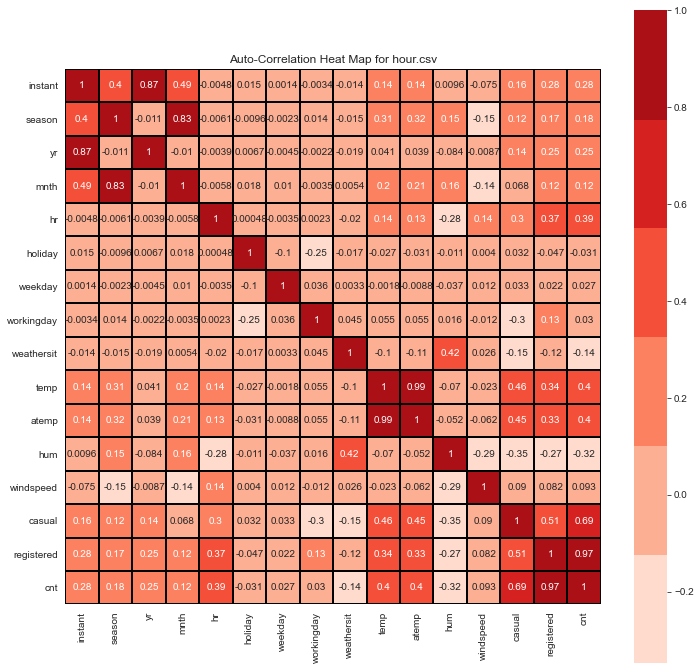

In [8]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

hour_df = pd.read_csv("hour.csv")
hour_corr_df = hour_df.corr(method='pearson') 
plt.figure(figsize=(12, 12))
sns.heatmap(data=hour_corr_df,
            annot=True, 
            cbar=True, 
            cmap=sns.color_palette(palette='Reds'), 
            linecolor='black', 
            linewidths=1, 
            square=True, 
            xticklabels=True, 
            yticklabels=True) 
plt.title('Auto-Correlation Heat Map for hour.csv')
plt.show() 


<Figure size 864x864 with 0 Axes>

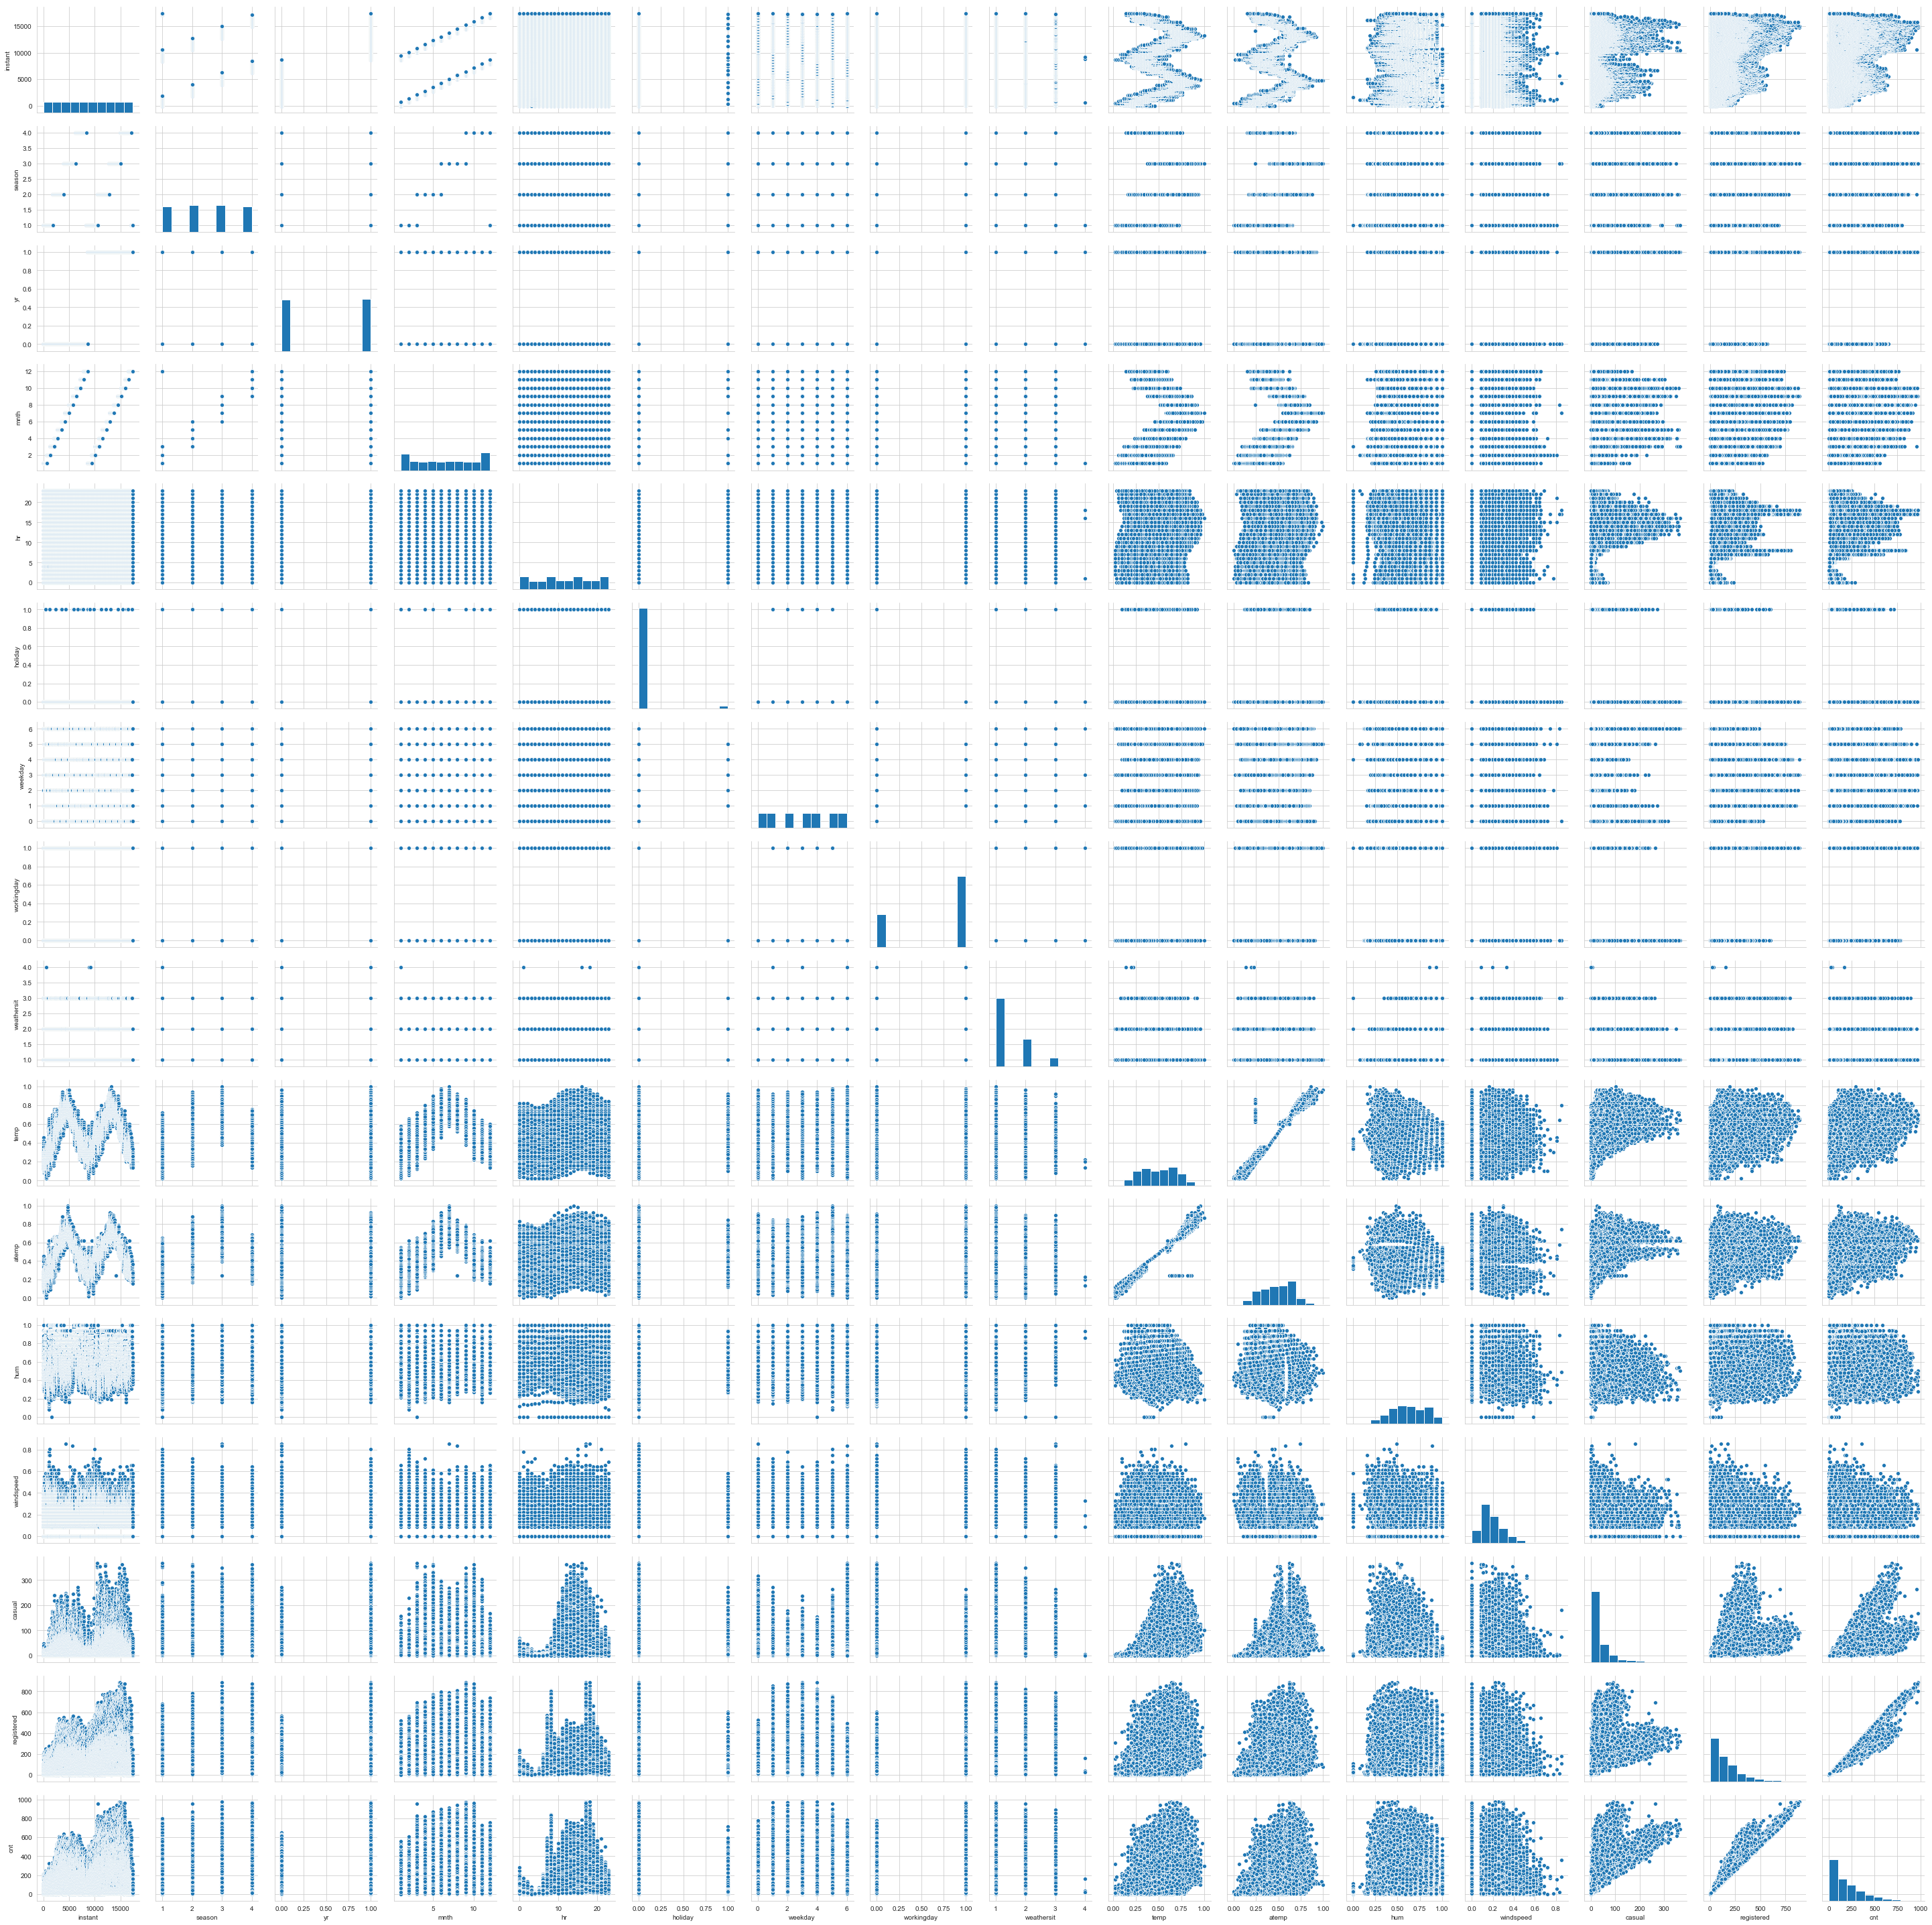

In [5]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

fig = plt.figure()
fig.suptitle('Pair Plot for hour.csv') 
hour_df=pd.read_csv("hour.csv")
sns.set_style(style='whitegrid')
sns.pairplot(data=hour_df, diag_kind='hist', palette=sns.color_palette('Greens'))
# plt.title('Pair Plot for hour.csv')
plt.show() 

Preprocessing and Choosing Parameters: 
The basic strategy in choosing features is by eliminating 1 out of each pair of unique, non-target features that share a high correlation coefficient *r >= 0.80*. Between 'temp' and 'atemp', 'temp' will stay because measured temperature does not have as much bias as felt temperature. Between 'mnth' and 'season', 'mnth' will stay as we will have more choices (12) for the variable representing the month, leading to higher accuracy. Between 'yr' and 'instant', 'instant' will stay since each instance of recording aligns with a specific hour while the year only limits us to 2 possible values. 'casual', the count of casual riders, is excluded as a trivial feature, especially that 'registered' number of riders has an extremely high correlation with the total count 'cnt'. Other than that, any feature that correlates with 'cnt' not previously chosen with a corrcoef >= 0.1 would be considered for testing as a good parameter or not. 

In [108]:
%pip install seaborn-qqplot

Note: you may need to restart the kernel to use updated packages.


The last 1/6 of rows will be reserved as a testing set.
[[512.63686651]
 [512.80879071]
 [591.35572834]
 ...
 [ 77.53352002]
 [ 38.1383371 ]
 [ 26.36880998]]
[[285.27233445]
 [285.87893319]
 [299.86751215]
 ...
 [188.34945915]
 [181.61610306]
 [180.80089131]]


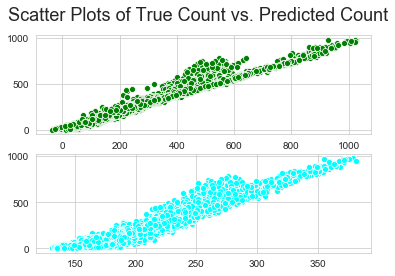

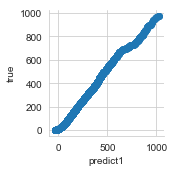

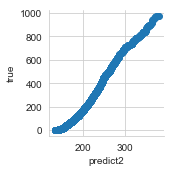

Mean predicted error without regularization: 41.429464
Mean predicted error with L2 regularization: 174.154980
Median absolute error without regularization: 19.679346
Median absolute error with L2 regularization: 115.544224
R2 without regularization: 0.963785
R2 with L2 regularization: 0.360060


In [21]:
import math 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import seaborn_qqplot as sqp 
from sklearn.linear_model import LinearRegression, Ridge  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error 
from sklearn.metrics import r2_score 


#data 
print("The last 1/6 of rows will be reserved as a testing set.")
hour_df = pd.read_csv('hour.csv') 
num_rows = len(hour_df.loc[:, ['instant']]) 
# print(num_rows)
parameters = ['instant', 'mnth', 'workingday', 'temp', 'hr', 'windspeed', 'registered']
training_set = hour_df.loc[:math.floor(num_rows * 5 / 6) - 1, parameters].to_numpy() 
# print(training_set)
# print(len(training_set))
targets = hour_df.loc[:len(training_set) - 1, ['cnt']].to_numpy(); 
# print(targets)
testing_set = hour_df.loc[len(training_set):, parameters].to_numpy()  
# print(testing_set)

#model without regularization 
model = LinearRegression(fit_intercept=True, copy_X=True, normalize=True).fit(X=training_set, y=targets)
predicted_set1 = model.predict(testing_set)
print(predicted_set1)

#model with L2 regularization 
model_ridge = Ridge(alpha=4.0, fit_intercept=True, copy_X=True, normalize=True).fit(X=training_set, y=targets)
predicted_set2 = model_ridge.predict(testing_set) 
print(predicted_set2)

#model performance
true_set = hour_df.loc[len(training_set):, ['cnt']].to_numpy()
sns.set_style(style='whitegrid') 
fig, (ax1, ax2) = plt.subplots(2, 1) 
sns.scatterplot(x=predicted_set1.flatten(), y=true_set.flatten(), color='green', ax=ax1)
sns.scatterplot(x=predicted_set2.flatten(), y=true_set.flatten(), color='cyan', ax=ax2) 
fig.suptitle(t='Scatter Plots of True Count vs. Predicted Count', fontsize=18)
plt.grid(b=True, which='major', axis='both') 

qq_df = pd.DataFrame({'predict1':predicted_set1.flatten(), 
                      'predict2':predicted_set2.flatten(), 
                      'true':true_set.flatten()} ) 

q_ax1 = sqp.qqplot(data=qq_df, x='predict1', y='true')
q_ax2 = sqp.qqplot(data=qq_df, x='predict2', y='true')
plt.show()

rmse_1 = math.sqrt(mean_squared_error(y_true=true_set, y_pred=predicted_set1))
rmse_2 = math.sqrt(mean_squared_error(y_true=true_set, y_pred=predicted_set2))
print("Mean predicted error without regularization: %f" % rmse_1)
print("Mean predicted error with L2 regularization: %f" % rmse_2)

mae_1 = median_absolute_error(y_true=true_set, y_pred=predicted_set1)
mae_2 = median_absolute_error(y_true=true_set, y_pred=predicted_set2)
print("Median absolute error without regularization: %f" % mae_1)
print("Median absolute error with L2 regularization: %f" % mae_2)

r2_1 = r2_score(y_true=true_set, y_pred=predicted_set1)
r2_2 = r2_score(y_true=true_set, y_pred=predicted_set2)
print("R2 without regularization: %f" % r2_1)
print("R2 with L2 regularization: %f" % r2_2)


    Time  Erdinger  Augustinerbrau  Budweiser
0      0      17.0            14.0       14.0
1     15      16.1            11.8       12.1
2     30      14.9            10.5       10.9
3     45      14.0             9.3       10.0
4     60      13.2             8.5        9.3
5     75      12.5             7.7        8.6
6     90      11.9             7.1        8.0
7    105      11.2             6.5        7.5
8    120      10.7             6.0        7.0
9    150       9.7             5.3        6.2
10   180       8.9             4.4        5.5
11   210       8.3             3.5        4.5
12   240       7.5             2.9        3.5
13   300       6.3             1.3        2.0
14   360       5.2             0.7        0.9


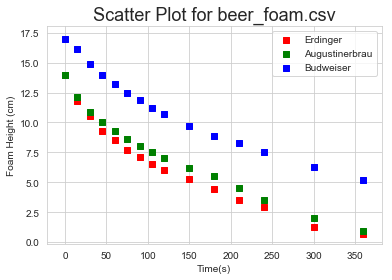

Predicting training_set (without regularization) for accuracy check.

[[15.39395297 11.09615528 11.75304218]
 [14.91282195 10.58901642 11.25080254]
 [14.43169093 10.08187757 10.7485629 ]
 [13.95055991  9.57473871 10.24632325]
 [13.46942889  9.06759985  9.74408361]
 [12.98829787  8.56046099  9.24184397]
 [12.50716685  8.05332214  8.73960433]
 [12.02603583  7.54618328  8.23736469]
 [11.54490482  7.03904442  7.73512505]
 [10.58264278  6.0247667   6.73064576]
 [ 9.62038074  5.01048899  5.72616648]
 [ 8.6581187   3.99621127  4.7216872 ]
 [ 7.69585666  2.98193356  3.71720791]
 [ 5.77133259  0.95337813  1.70824935]
 [ 3.84680851 -1.0751773  -0.30070922]]

Estimated foam height (cm) at t = 450s:  [[ 0.9600224  -4.11801045 -3.31414707]]

Predicting training_set (with regularization) for accuracy check.

[[15.39394243 11.09614418 11.75303118]
 [14.91281261 10.58900658 11.25079279]
 [14.43168279 10.08186898 10.7485544 ]
 [13.95055297  9.57473139 10.24631601]
 [13.46942314  9.06759379  9.74407761]

In [51]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression, Ridge 

beer_df = pd.read_csv('beer_foam.csv')
print(beer_df)
color = 0 
beer_color = ['r', 'g', 'b'] 
for col in beer_df.columns.difference(['Time']): 
    plt.scatter(x=beer_df['Time'], y=beer_df[str(col)], c=beer_color[color], marker='s')
    color+=1 
plt.title(label='Scatter Plot for beer_foam.csv', fontsize=18) 
plt.xlabel('Time(s)') 
plt.ylabel('Foam Height (cm)')
plt.legend(labels=beer_df.columns[1:4]) 
plt.grid(b=True, which='major', axis='both')
plt.show() 

#model without regularization 
training_set = np.asarray([beer_df['Time'].tolist()]).T
targets = beer_df[beer_df.columns[1:]].to_numpy()
testing_set = np.asarray([beer_df['Time'].tolist()]).T
model = LinearRegression(fit_intercept=True, copy_X=True).fit(X=testing_set, y=targets)

print("Predicting training_set (without regularization) for accuracy check.\n")  
predicted_set1 = model.predict(X=testing_set) 
print(predicted_set1) 

testing_set_450 = [[450]] 
predicted_set1_450 = model.predict(X=testing_set_450)
print("\nEstimated foam height (cm) at t = 450s: ", predicted_set1_450)

#model with L2 regularization 
_lambda = 0.4 
model_ridge = Ridge(alpha=_lambda, fit_intercept=True, copy_X=True).fit(X=training_set, y=targets) 

print("\nPredicting training_set (with regularization) for accuracy check.\n") 
predicted_set2 = model_ridge.predict(testing_set)
print(predicted_set2) 
predicted_set2_450 = model_ridge.predict(X=testing_set_450)
print("\nEstimated foam height (cm) at t = 450s: ", predicted_set2_450)


Model without regularization: 

The model was definitely not too accurate. For Augustinerbrau and Budweiser, the predicted values were negative since the latest recorded values at t = 360s were already extremely close to zero (0). The downward trend of the model, which uses a negative slope, underestimated by the absolute value of the predicted foam heights because foam height is no lower that zero (0) in real life. 

Model with regularization: 

The regularized model did perform better, but the increase in accuracy produced noticeable change in numbers only on the scale of 10^-5. Predicted foam height for all 3 beers slightly increased. This is expected. As seen in the scatter plot, each increase in 15s plots a new point but with a smaller difference from the most recent point for the same beer. In short, the 1st derivative of a polynomial regression line is negative at each time t, but the 2nd derivative is positive as t increases. 